This script is an exmaple for creating and fitting PSDs of data. Currently loads in .mat files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio
import scipy.optimize as opt

In [2]:
def load_data(filepath, channels):
    data = sio.loadmat(filepath)
    tts = np.zeros((len(channels), data['Length'][0][0]))
    for n, i in enumerate(channels):
        tt = np.transpose(data[i])[0]
        tts[n] = tt
    return tts, data['Tinterval'][0][0]

def linewidth(f, f0, A, y, c):
    return A/((f**2-f0**2)**2+(f*y)**2) + c

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

def fit_and_plot_PSD(PSD, lb, ub, p0):
    PSDs_fitted = []
    PSD_fits = []
    for i in PSD:
        pop, cov = opt.curve_fit(linewidth, i[0][lb:ub], i[1][lb:ub], p0 = p0)
        PSD_fits.append(pop)
        PSD_fitted = linewidth(i[0], pop[0], pop[1], pop[2], pop[3])
        PSDs_fitted.append(PSD_fitted)

    plt.figure(figsize = (5, 5))
    for n, i in enumerate(PSD):
        plt.plot(i[0][lb:ub]/1000, i[1][lb:ub])
        plt.plot(i[0][lb:ub]/1000, PSDs_fitted[n][lb:ub])
    plt.yscale('log')
    plt.ylabel('PSD (V$^2$/Hz)')
    plt.xlabel('Frequency (kHz)')
    plt.show()

    
    return PSD_fits, PSDs_fitted

In [166]:
calz = 0.0016724781717892645

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230825\\z kp 2\\'
extensions = ['-10.mat', '-20.mat', '-50.mat', '-75.mat', '-100.mat', '-150.mat','-200.mat'] 
channels = ['A', 'B']

PSDA3, PSDB3 = make_PSDs(filepath, extensions, channels)

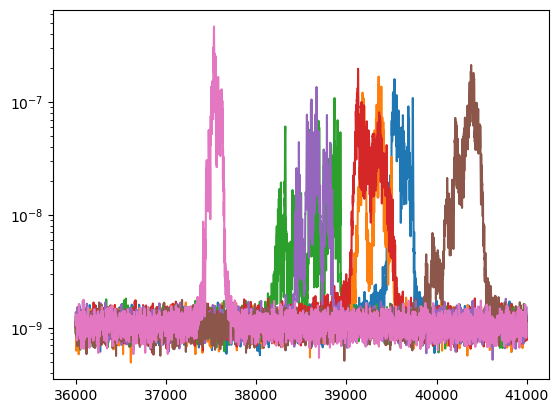

In [167]:
lb1 = 36000
ub1 = 41000
lb2 = 165000
ub2 = 181000
lb3 = 142000
ub3 = 154000
for i in PSDA3:
    plt.plot(i[0][lb1:ub1], i[1][lb1:ub1])
plt.yscale('log')

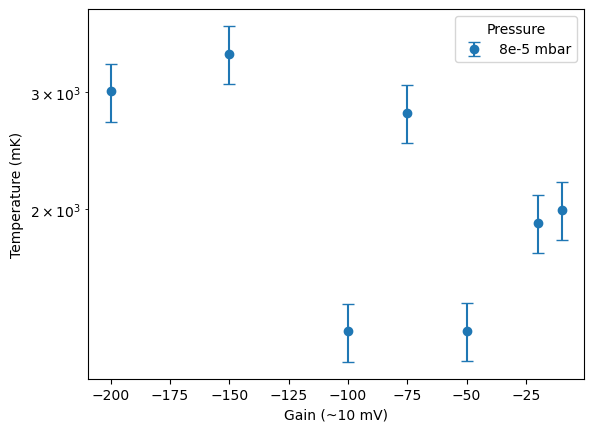

In [168]:
areas3 = []
for i in PSDA3:
    area = np.trapz(i[1][lb1:ub1], i[0][lb1:ub1])
    areas3.append(area - 10*10**(-10)*5000)

gain1 = [-10, -20, -50, -75, -100, -150, -200,]
#gain1 = [5, 10, 15, 20, 25, 30, 35, 40]

plt.errorbar(gain1, np.array(areas3)/calz*293*1000, yerr = 0.1*np.array(areas3)/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '8e-5 mbar')
#plt.errorbar(gain2, np.array(areas2)/calx*293*1000, yerr = 0.1*np.array(areas2)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.2e-5 mbar')
#plt.errorbar(gain2, np.array(areas3)/calx*293*1000, yerr = 0.1*np.array(areas3)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.4e-6 mbar')
plt.yscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Gain (~10 mV)')
plt.legend(title = 'Pressure')

In [162]:
np.std(areas)/np.sqrt(5)
#np.mean(areas)

1.2060578133381141